In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [42]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')
Train_data.dropna(inplace=True)
Test_data.dropna(inplace=True)

In [43]:
Train_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)
Test_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)
X_train = Train_data.iloc[:10000, :-1]
Y_train = Train_data.iloc[:10000, -1]
X_test = Test_data.iloc[:3000, :-1]
Y_test = Test_data.iloc[:3000, -1]

In [44]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Female,Loyal Customer,23,Personal Travel,Eco,1624,3,3,3,1,...,2,2,4,4,5,3,4,2,45,35.0
10022,Male,disloyal Customer,59,Business travel,Eco,302,1,1,1,4,...,1,1,2,3,3,3,3,1,38,38.0
10023,Female,Loyal Customer,32,Business travel,Business,2841,5,5,5,5,...,4,4,5,2,5,4,5,4,3,1.0
10024,Female,Loyal Customer,14,Personal Travel,Eco,599,1,4,1,3,...,3,3,4,5,3,2,4,3,86,88.0


In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()
X_train['Gender'] = labelencoder_X.fit_transform(X_train['Gender'])  
X_test['Gender'] = labelencoder_X.transform(X_test['Gender'])  

X_train['Customer Type'] = labelencoder_X.fit_transform(X_train['Customer Type'])
X_test['Customer Type'] = labelencoder_X.transform(X_test['Customer Type'])  

X_train['Type of Travel'] = labelencoder_X.fit_transform(X_train['Type of Travel'])
X_test['Type of Travel'] = labelencoder_X.transform(X_test['Type of Travel'])

X_train['Class'] = labelencoder_X.fit_transform(X_train['Class'])
X_test['Class'] = labelencoder_X.transform(X_test['Class'])

Y_train = labelencoder_Y.fit_transform(Y_train) 
Y_test = labelencoder_Y.transform(Y_test) 

In [46]:
X_train.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_test.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_train_arr=X_train.values
X_test_arr=X_test.values

 ## Scale the Data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_arr)
scaled_X_train = scaler.transform(X_train_arr) 
scaled_X_test = scaler.transform(X_test_arr) 

 ## Principal component analysis


In [48]:
from sklearn.decomposition import PCA
pca = PCA() ## All components
X_pca = pca.fit_transform(scaled_X_train)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

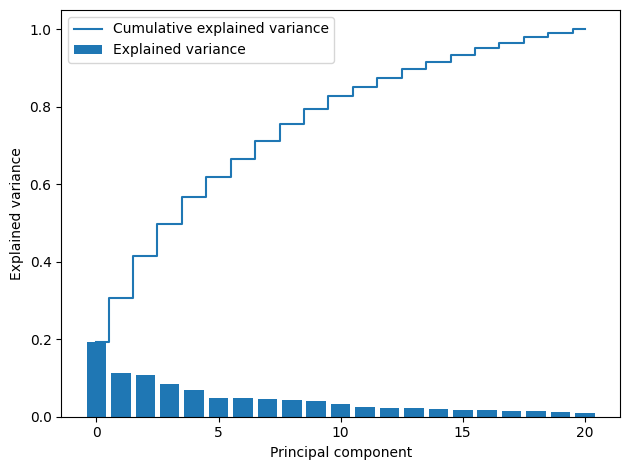

In [49]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

 ## PCA(2 components)

In [50]:
from sklearn.ensemble import RandomForestClassifier
pca = PCA(n_components=2)
pca_x_train = pca.fit_transform(scaled_X_train)
pca_x_test = pca.fit_transform(scaled_X_test)
model_RFC = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC.fit(pca_x_train, Y_train)
pred_RFC = model_RFC.predict(pca_x_test)
print(classification_report(Y_test,pred_RFC))
print(accuracy_score(Y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1681
           1       0.79      0.72      0.75      1319

    accuracy                           0.79      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.79      0.79      0.79      3000

0.7906666666666666


 ## PCA(15 components)

In [51]:
pca = PCA(n_components=15)
pca_x_train = pca.fit_transform(scaled_X_train)
pca_x_test = pca.fit_transform(scaled_X_test)
model_RFC = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC.fit(pca_x_train, Y_train)
pred_RFC = model_RFC.predict(pca_x_test)
print(classification_report(Y_test,pred_RFC))
print(accuracy_score(Y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1681
           1       0.88      0.76      0.81      1319

    accuracy                           0.85      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.85      0.84      3000

0.8456666666666667


 ## TSNE(2 components)

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_x_train = tsne.fit_transform(scaled_X_train)
tsne_x_test = tsne.fit_transform(scaled_X_test)
model_RFC = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC.fit(tsne_x_train, Y_train)
pred_RFC = model_RFC.predict(tsne_x_test)
print(classification_report(Y_test,pred_RFC))
print(accuracy_score(Y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1681
           1       0.88      0.54      0.67      1319

    accuracy                           0.76      3000
   macro avg       0.80      0.74      0.74      3000
weighted avg       0.79      0.76      0.75      3000

0.7646666666666667


 ## Color Quantization using K-Means

In [66]:
from time import time
import cv2
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
n_colors = 64
mokoko = cv2.imread("mokoko.jpeg",cv2.IMREAD_UNCHANGED)
mokoko = np.array(mokoko , dtype=np.float64) / 255
unique_colors=len(np.unique(mokoko))

In [70]:
w, h, d = original_shape = tuple(mokoko.shape)
image_array = np.reshape(mokoko, (w * h, d))

In [71]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

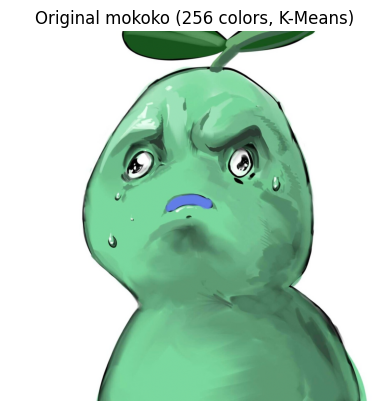

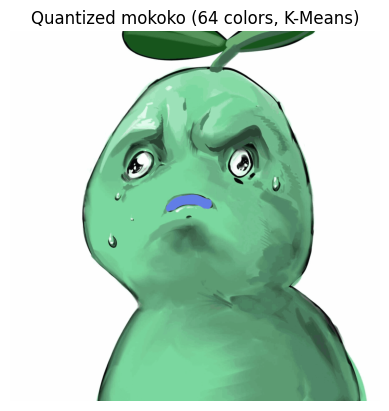

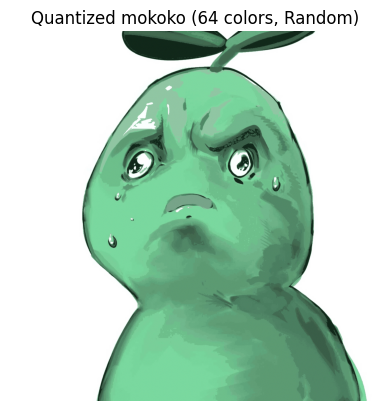

In [72]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original mokoko ({unique_colors} colors, K-Means)")
plt.imshow(mokoko)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized mokoko ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized mokoko ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

 ## NLP

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
Text_data= pd.read_csv('Emotion_classify_Data.csv')
X_text_train = Text_data.iloc[:, :-1]
Y_text_train = Text_data.iloc[:, -1]

In [90]:
X_text_train

,Comment
0,i seriously hate one subject to death but now ...
1,im so full of life i feel appalled
2,i sit here to write i start to dig out my feel...
3,ive been really angry with r and i feel like a...
4,i feel suspicious if there is no one outside l...
...,...
5932,i begun to feel distressed for you
5933,i left feeling annoyed and angry thinking that...
5934,i were to ever get married i d have everything...
5935,i feel reluctant in applying there because i w...


In [91]:
Text_data.head

<bound method NDFrame.head of                                                 Comment Emotion
0     i seriously hate one subject to death but now ...    fear
1                    im so full of life i feel appalled   anger
2     i sit here to write i start to dig out my feel...    fear
3     ive been really angry with r and i feel like a...     joy
4     i feel suspicious if there is no one outside l...    fear
...                                                 ...     ...
5932                 i begun to feel distressed for you    fear
5933  i left feeling annoyed and angry thinking that...   anger
5934  i were to ever get married i d have everything...     joy
5935  i feel reluctant in applying there because i w...    fear
5936  i just wanted to apologize to you because i fe...   anger

[5937 rows x 2 columns]>

In [92]:
from collections import Counter
Counter(Text_data['Emotion'])

Counter({'fear': 1937, 'anger': 2000, 'joy': 2000})

## Visualization

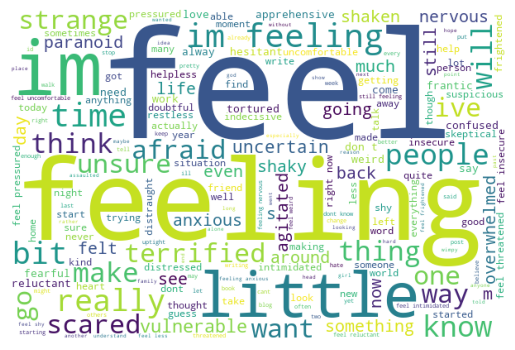

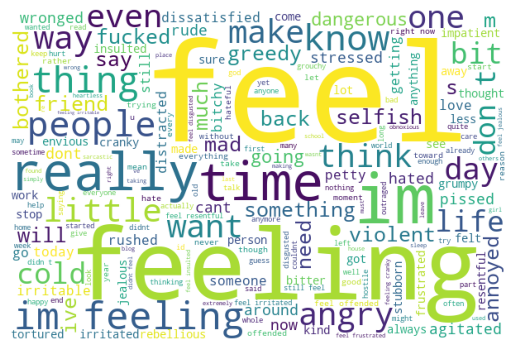

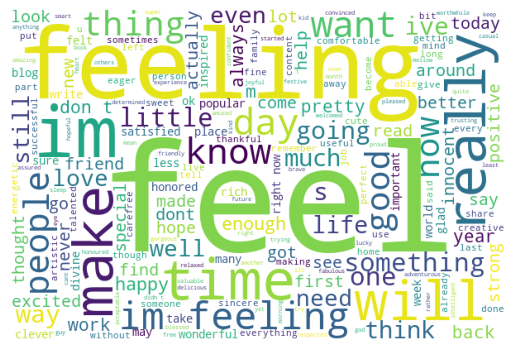

In [93]:
def visualize(label):
    text = ''
    for msg in Text_data[Text_data['Emotion'] == label]['Comment']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('fear')
visualize('anger')
visualize('joy')

In [116]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(Text_data['Comment'], Text_data['Emotion'], test_size=0.20)

In [117]:
labelencoder_text = LabelEncoder()
Y_text_train = labelencoder_text.fit_transform(Y_text_train) 
Y_text_test = labelencoder_text.transform(Y_text_test) 

In [129]:
vectorizer = CountVectorizer()
X_text_train_transformed = vectorizer.fit_transform(X_text_train)
X_text_test_transformed = vectorizer.transform(X_text_test)

In [130]:
model_RFC_text = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC_text.fit(X_text_train_transformed, Y_text_train)
pred_RFC_text = model_RFC_text.predict(X_text_test_transformed)
print(classification_report(Y_text_test,pred_RFC_text))
print(accuracy_score(Y_text_test,pred_RFC_text))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       408
           1       0.94      0.90      0.92       396
           2       0.93      0.93      0.93       384

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

0.9225589225589226
